## Data setup

In [4]:
include("main_utils.jl")
include("data_setup.jl")
default_plot_setting()

Plots.GRBackend()

## Prepare datasets

In [5]:
df_master = read_survey_master_data();

In [6]:
include("main_utils.jl")
include("data_setup.jl")
read_funcs = [
    read_comix_uk_dds,
    read_Danon_2013_dds,
    read_Danon_2013_stratified_dds,
    read_Zhang_2019_dds,
    read_Leung_2017_paper_online, # Leung_2017 is also read in read_dd_single_survey
    read_comix2_dds,
    read_comix2_stratified_dds,
    read_Read_2014_dds,
]

df_dd_mer = DataFrame()
for read_func in read_funcs
    df_dd, _ = read_func()
    df_dd_mer = vcat(df_dd_mer, df_dd)
end

key_lis = ["Mossong_2008", "Grijalva_2015", "Leung_2017", "Horby_2011",
    "Dodd_2016", "Willem_2012", "Wirya_2020", "Kassteele_2017",
]
for k in key_lis
    df_dd, _ = read_dd_single_survey(df_master, k)
    df_dd_mer = vcat(df_dd_mer, df_dd)
end

key_lis = ["Hens_2009", "Beraud_2015", "Melegaro_2017"]
for k in key_lis
    df_dd, _ = read_dd_two_day_survey(df_master, k)
    df_dd_mer = vcat(df_dd_mer, df_dd)
end
CSV.write("../dt_surveys_master/master_dds.csv", df_dd_mer)


Number of removing ids: 0


┌ Warning: thread = 1 warning: only found 20 / 21 columns around data row: 4349. Filling remaining columns with `missing`
└ @ CSV /opt/julia/packages/CSV/XLcqT/src/file.jl:592
┌ Warning: thread = 6 warning: only found 20 / 21 columns around data row: 5078. Filling remaining columns with `missing`
└ @ CSV /opt/julia/packages/CSV/XLcqT/src/file.jl:592
┌ Warning: thread = 9 warning: only found 20 / 21 columns around data row: 3926. Filling remaining columns with `missing`
└ @ CSV /opt/julia/packages/CSV/XLcqT/src/file.jl:592
┌ Warning: thread = 6 warning: only found 20 / 21 columns around data row: 4371. Filling remaining columns with `missing`
└ @ CSV /opt/julia/packages/CSV/XLcqT/src/file.jl:592
┌ Warning: thread = 6 warning: only found 20 / 21 columns around data row: 4372. Filling remaining columns with `missing`
└ @ CSV /opt/julia/packages/CSV/XLcqT/src/file.jl:592
┌ Warning: thread = 6 warning: only found 20 / 21 columns around data row: 4457. Filling remaining columns with `missing

Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 7
Number of removing ids: 2
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 0
Number of removing ids: 1
Number of removing ids: 0
Number of removing ids: 7
Number of removing ids: 0
Number of removing ids: 228


"../dt_surveys_master/master_dds.csv"

## Working
TODO: remove this esection in the last.

In [7]:
include("main_utils.jl")
include("data_setup.jl")
default_plot_setting()

Plots.GRBackend()

In [8]:
include("main_utils.jl")
include("data_setup.jl")
@pipe groupby(df_dd, [:strat, :key]) |> combine(_, :y => sum => :n_part) |> display
plot_single_survey(df_dd)

LoadError: UndefVarError: `df_dd` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

## Survey characteristics 

In [1]:
include("main_utils.jl")
include("data_setup.jl")

transform_comix2 (generic function with 1 method)

In [ ]:
df_dds = CSV.read("../dt_surveys_master/master_dds.csv", DataFrame);

println("Check max daly number of contacts")
tab = @pipe groupby(df_dds, [:key, :strat]) |> combine(_, :x => maximum => :max_cnt)
unstack(tab, :key, :strat, :max_cnt)

Check max daly number of contacts


"./tmp.csv"

In [11]:
println("Check sample size")
tab = @pipe groupby(df_dds, [:key, :strat]) |> combine(_, :y => sum => :n_part)
unstack(tab, :key, :strat, :n_part)

Check sample size


Row,key,all,home,non-home
,String31,Int64?,Int64?,Int64?
1,CoMix_uk_internal,88965,88965,88965
2,Danon_2013,5200,5200,5200
3,Danon_2013_post,3783,3783,3783
4,Danon_2013_online,1417,1417,1417
5,Zhang_2019,754,754,754
6,Leung_2017_online,544,544,544
7,Leung_2017_paper,343,343,343
8,CoMix2,37347,37347,37347
9,CoMix2_at,4155,4155,4155


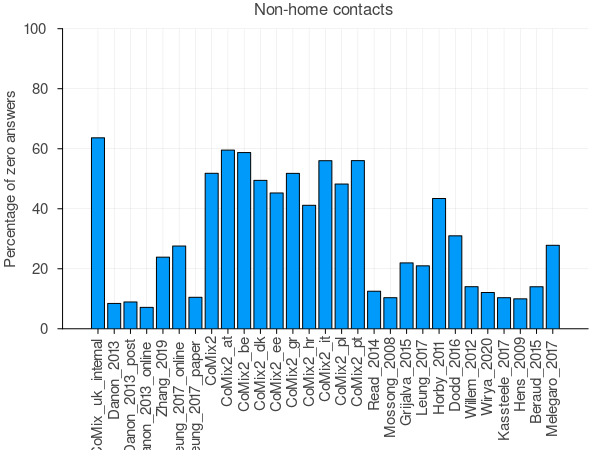

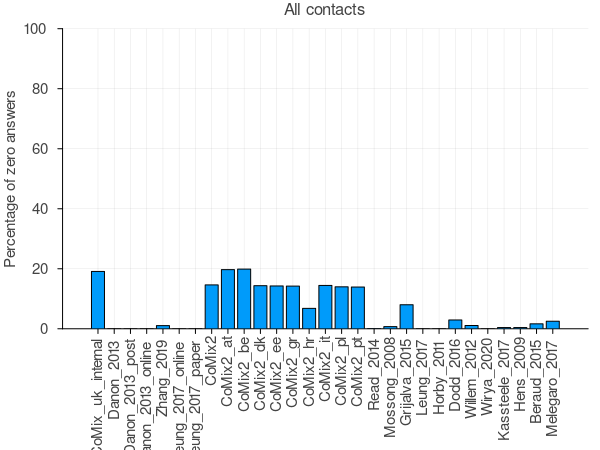

In [12]:
plot_zero_pct(df_dds)

In [39]:
include("data_setup.jl")

transform_comix2 (generic function with 1 method)

In [17]:
for i in df_dds[:, :key] |> unique
    println(i)
end

CoMix_uk_internal
Danon_2013
Danon_2013_post
Danon_2013_online
Zhang_2019
Leung_2017_online
Leung_2017_paper
CoMix2
CoMix2_at
CoMix2_be
CoMix2_dk
CoMix2_ee
CoMix2_gr
CoMix2_hr
CoMix2_it
CoMix2_pl
CoMix2_pt
Read_2014
Mossong_2008
Grijalva_2015
Leung_2017
Horby_2011
Dodd_2016
Willem_2012
Wirya_2020
Kassteele_2017
Hens_2009
Beraud_2015
Melegaro_2017


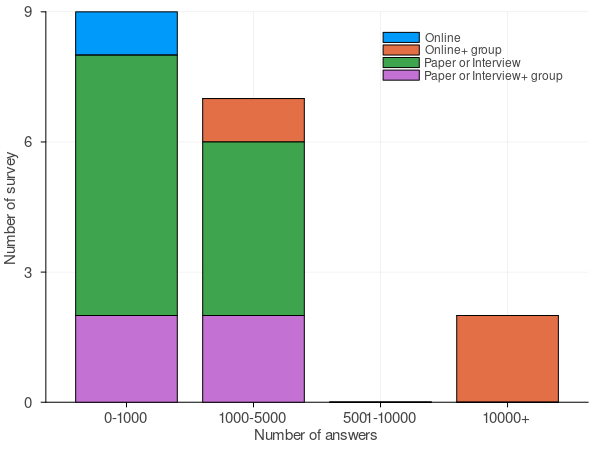

In [40]:
stacked_bar_cate(df_dds)

## Create all, home, non-home contact figure

In [64]:
include("main_utils.jl")
include("data_setup.jl")

transform_comix2 (generic function with 1 method)

In [42]:
df_dds = CSV.read("../dt_surveys_master/master_dds.csv", DataFrame);
clean_key_names!(df_dds);

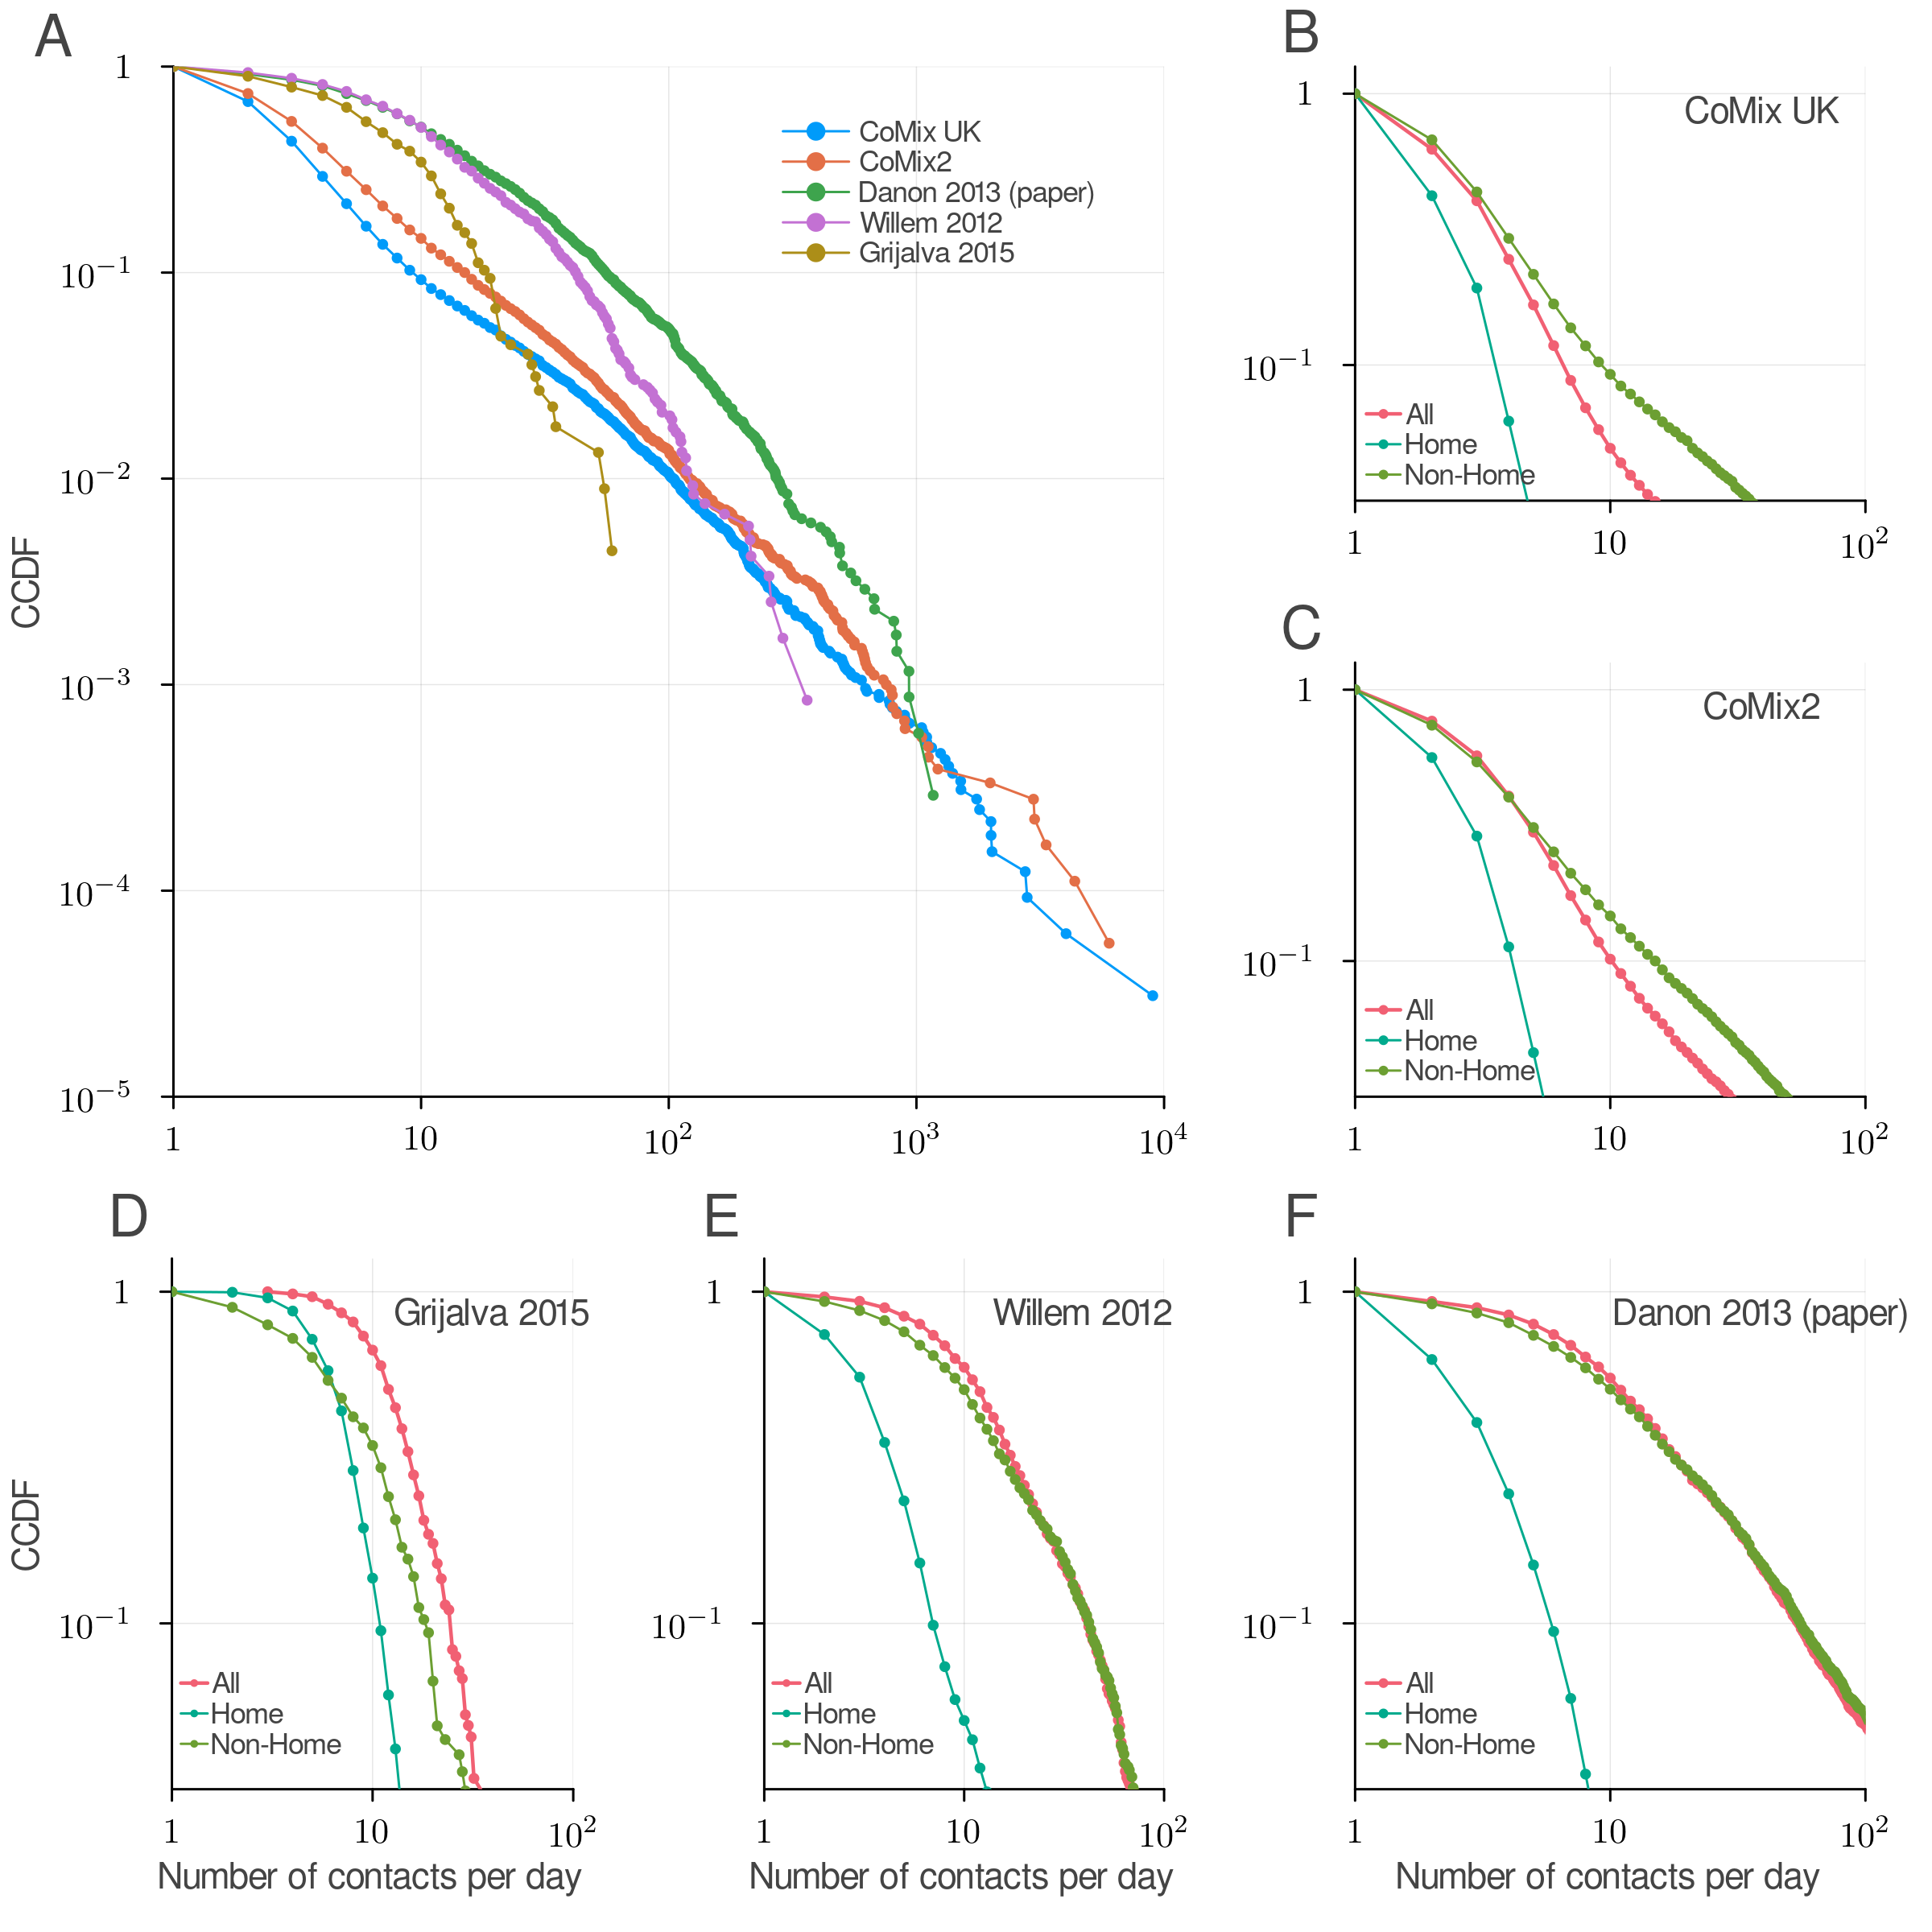

In [75]:
# TODO: change yticks to 10^5 styl
include("main_utils.jl")
include("data_setup.jl")
pl = plot_all_deg_and_separate_subplots(df_dds)
savefig(pl, "../fig/deg_dist_all_hm_nhm.png")
pl

In [ ]:
include("main_utils.jl")
include("data_setup.jl")
keys = ["CoMix UK", "CoMix2", "Danon 2013 (paper)", "Willem 2012", "Grijalva 2015"]
df_dds_tmp = @subset(df_dds, in.(:key, Ref(keys)), :strat .== "non-home")

xtk = ([1, 10, 100, 1000, 10_000], [L"1", L"10", L"10^{2}", L"10^{3}", L"10^{4}"])
pl = plot(; xaxis = :log10, ylim = [-5, 0], xlim=[1, 10_000], xticks = xtk)
for k in keys
    dd = @subset(df_dds_tmp, :key .== k) |> DegreeDist
    plot_ccdf!(pl, dd; label=k, markersize=2.5, markerstrokewidth = 0.0)
end
ind_incl = 6
ytk = (
    [0, -1, -2, -3, -4, -5][ind_incl],
    [L"1", L"10^{-1}", L"10^{-2}", L"10^{-3}", L"10^{-4}", L"10^{-5}"][ind_incl])
pl1 = plot_all_hm_nhm(df_dds, "CoMix2";
    xlim=[1, 10_000], ylim=[-5, 0], xticks=xtk) #, yticks=ytk)
plot!(pl, xlabel="Number of contacts per day", ylabel="CCDF")
plot!(pl1, xlabel="Number of contacts per day")
pl_save = plot(pl, pl1, size=(800, 400), left_margin=5Plots.mm, bottom_margin=5Plots.mm)
savefig(pl_save, "../fig/tmp.png")

"/workdir/fig/tmp.png"

## Check paper and online degree dist

In [ ]:
include("main_utils.jl")
include("data_setup.jl")

In [ ]:
df_dd1, _ = read_dd_single_survey(df_master, "Leung_2017")
df_dd2, _ = read_Leung_2017_paper_online();
df_dd = vcat(df_dd1, df_dd2)
df_dd_nhm = @subset(df_dd, :strat .== "non-home")
pl1 = plot_pdf_across_survey(df_dd_nhm)
pl2 = plot_ccdf_across_survey(df_dd_nhm)
plot(pl1, pl2, size=(800, 400))

In [ ]:
df_dd1, _ = read_Danon_2013_dds()
df_dd2, _ = read_Danon_2013_stratified_dds();
df_dd = vcat(df_dd1, df_dd2)
df_dd_nhm = @subset(df_dd, :strat .== "non-home")
pl1 = plot_pdf_across_survey(df_dd_nhm)
pl2 = plot_ccdf_across_survey(df_dd_nhm)
plot(pl1, pl2, size=(800, 400))

## Check som surveys 

In [ ]:
pl1 = plot_pdf_across_survey(df_dd_nhm)
pl2 = plot_ccdf_across_survey(df_dd_nhm)

In [ ]:
df_dd, _ = read_comix2_stratified_dds();
df_dd_nhm = @subset(df_dd, :strat .== "non-home")
pl1 = plot_pdf_across_survey(df_dd_nhm)
pl2 = plot_ccdf_across_survey(df_dd_nhm)
plot(pl1, pl2, size=(800, 400))

In [ ]:
df_dd, _ = read_Zhang_2019_dds();
plot_single_survey(df_dd)